<a href="https://colab.research.google.com/github/parthnijh/walmart-sales-forecasting/blob/main/walmart_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

ft=pd.read_csv("/content/drive/MyDrive/walmart/features.csv")
train=pd.read_csv("/content/drive/MyDrive/walmart/train.csv")
stores=pd.read_csv("/content/drive/MyDrive/walmart/stores.csv")
test=pd.read_csv("/content/drive/MyDrive/walmart/test.csv")


In [3]:
import matplotlib.pyplot as plt



# Walmart Demand Forecasting – Notebook Steps

# 1️⃣ Project Setup

# 2️⃣ Data Loading & Merging

# 3️⃣ Exploratory Data Analysis (EDA)

# 4️⃣ Time-based Train/Validation Split

# 5️⃣ Feature Engineering

# 6️⃣ Model Training

# 7️⃣ MLflow Integration

# 8️⃣ Model Evaluation



⸻



In [4]:
ft.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
train_merge=train.merge(ft,on=["Store","Date"],how="left")
test_merge=test.merge(ft,on=["Store","Date"],how="left")


In [6]:
train_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
test_merge.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False


In [8]:
train_merge.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [9]:
train_merge.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [10]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(2), object(1)
memory usage: 42.6+ MB


In [11]:
train_merge["Date"]=pd.to_datetime(train_merge["Date"])

In [12]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
dtypes: bool(2), datet

In [13]:
bool_cols=["IsHoliday_x","IsHoliday_y"]
for col in bool_cols:
  train_merge[col]=train_merge[col].astype(int)

In [14]:
train_merge

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,0
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,0
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,0
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,0


In [15]:
## fill the missing values of the markdown column as zero as no promotion was done for the nan values
cols=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
for col in cols:
  train_merge[col]=train_merge[col].fillna(0)


In [16]:
(train_merge['IsHoliday_x'] == train_merge['IsHoliday_y']).all()


np.True_

In [17]:

train_merge = train_merge.drop(columns=['IsHoliday_y'])


train_merge.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)


In [18]:
train_merge.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [19]:
train_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


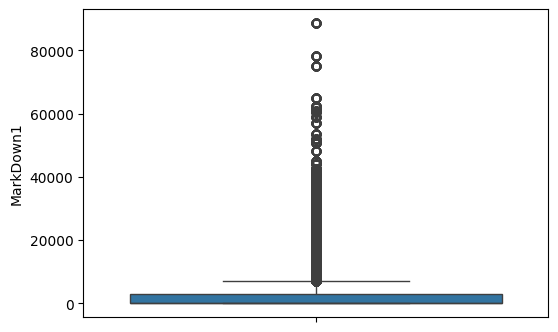

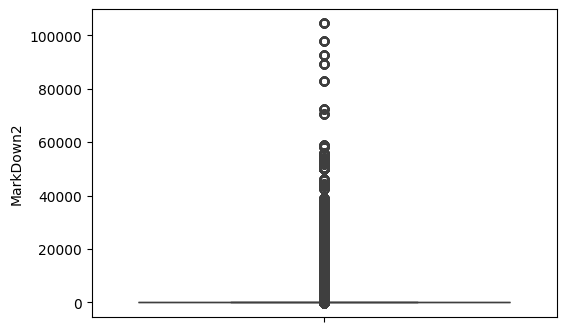

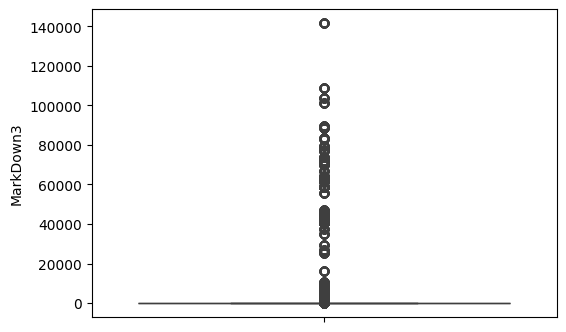

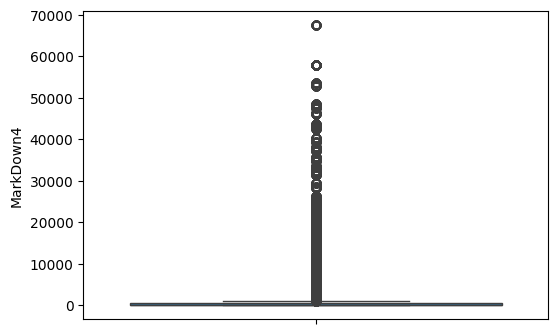

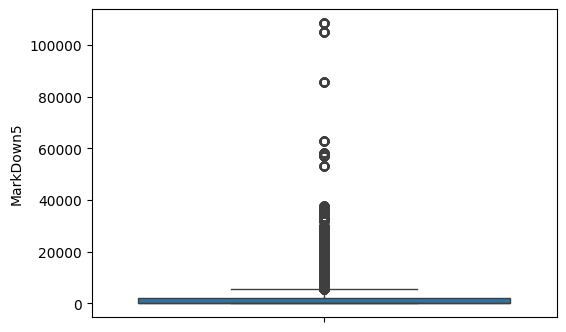

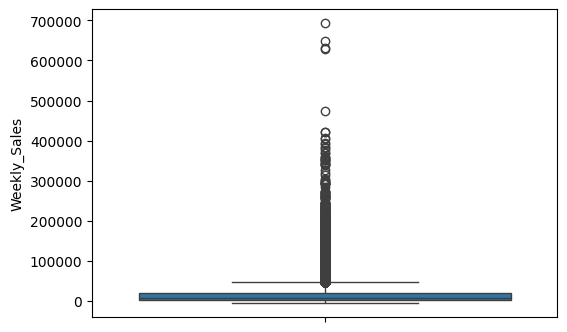

In [20]:
# the cols weekly sales ,markdown1-5 appeared to have outliers when we did describe() ,lets plot and see
import seaborn as sns
cols=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Weekly_Sales"]
for col in cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(train_merge[col])
  plt.show()


However these arent outliers , they represent major events or major promotion expenses , hence not removing them is better

In [21]:
train_merge["week"]=train_merge["Date"].dt.isocalendar().week

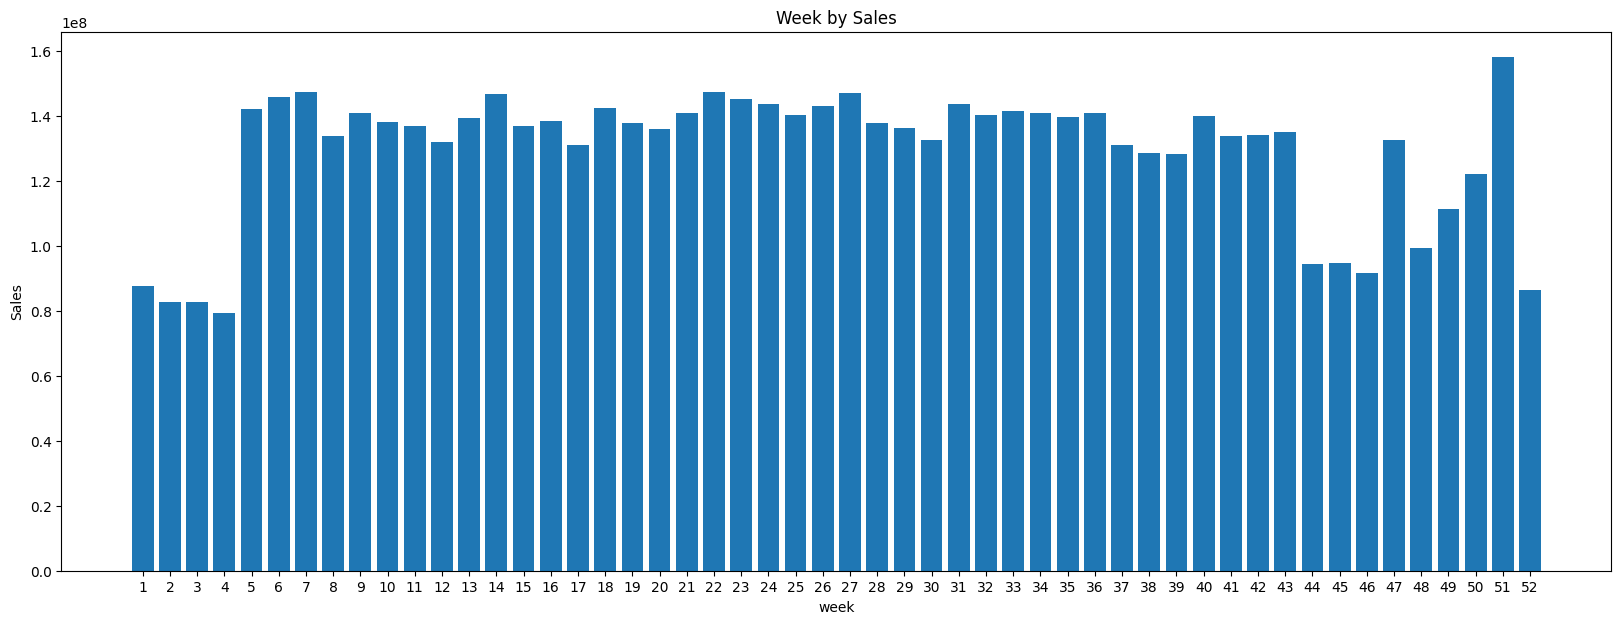

In [22]:
Weeksales=train_merge.groupby("week")["Weekly_Sales"].sum()
plt.figure(figsize=(20,7))
plt.title("Week by Sales")
plt.bar(Weeksales.index,Weeksales.values)
plt.xticks(Weeksales.index)

plt.xlabel("week")
plt.ylabel("Sales")
plt.show()

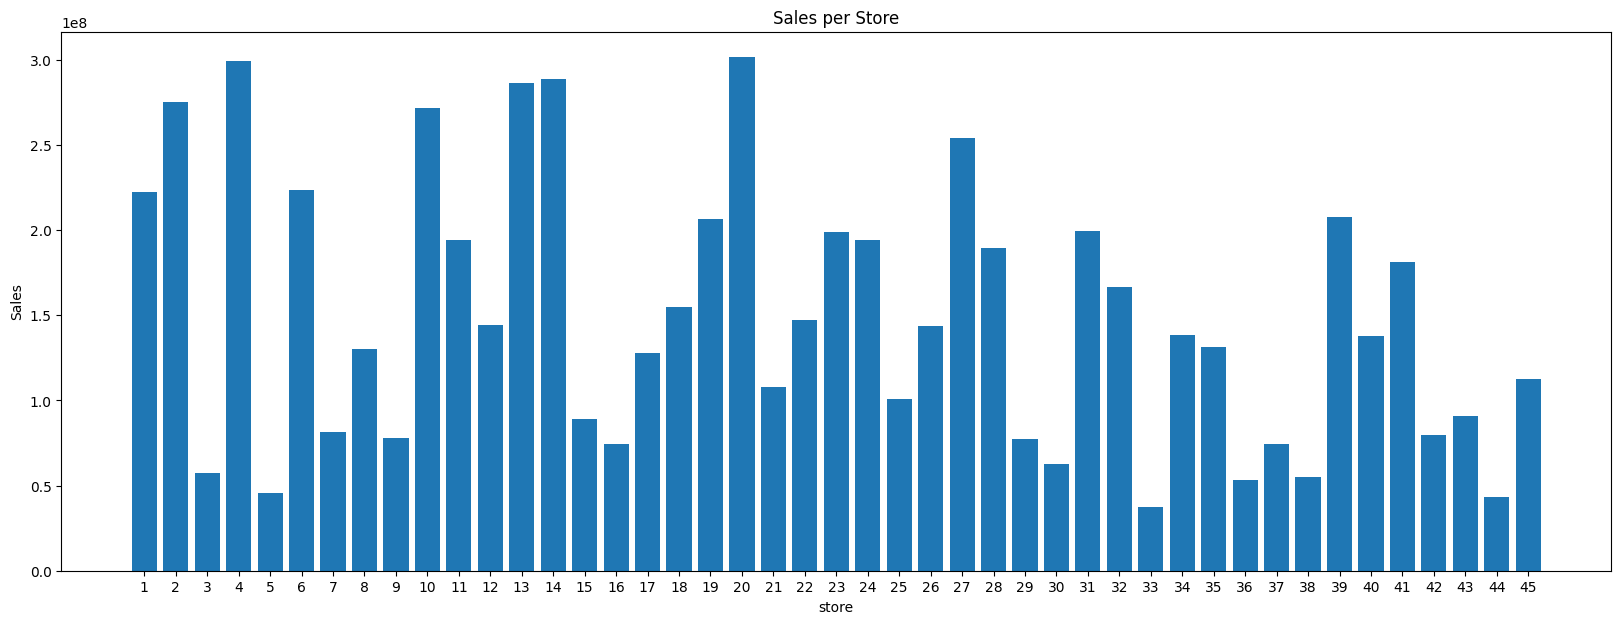

In [23]:
# sales by dept and sales by store
salesbystore=train_merge.groupby("Store")["Weekly_Sales"].sum()
plt.figure(figsize=(20,7))
plt.title("Sales per Store")
plt.bar(salesbystore.index,salesbystore.values)
plt.xticks(salesbystore.index)

plt.xlabel("store")
plt.ylabel("Sales")
plt.show()

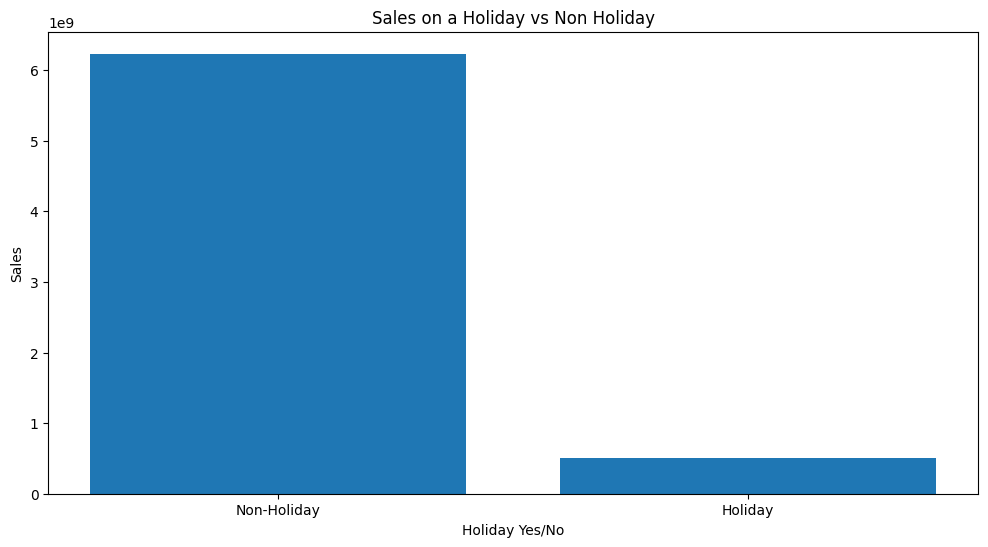

In [24]:
salesbyholiday=train_merge.groupby("IsHoliday")["Weekly_Sales"].sum()
plt.figure(figsize=(12,6))
plt.title("Sales on a Holiday vs Non Holiday")
plt.bar(salesbyholiday.index,salesbyholiday.values)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.xlabel("Holiday Yes/No")
plt.ylabel("Sales")
plt.show()

# We Make Cols to represent sales of last 1 ,4 and 8 weeks and also a column to represent the summary or mean of the last 4 weeks sale

In [25]:


train_merge = train_merge.sort_values(['Store', 'Dept', 'Date'])

train_merge['lag_1'] = (
    train_merge
    .groupby(['Store','Dept'])['Weekly_Sales']
    .shift(1)
)

train_merge['lag_4'] = (
    train_merge
    .groupby(['Store','Dept'])['Weekly_Sales']
    .shift(4)
)
train_merge['lag_8'] = (
    train_merge
    .groupby(['Store','Dept'])['Weekly_Sales']
    .shift(8)
)
train_merge['rolling_mean_4'] = (
    train_merge
    .groupby(['Store','Dept'])['Weekly_Sales']
    .shift(1)
    .rolling(4)
    .mean()
)

In [26]:
from sklearn.preprocessing import LabelEncoder
st=LabelEncoder()
dept=LabelEncoder()
train_merge["Store"]=st.fit_transform(train_merge["Store"])
train_merge["Dept"]=dept.fit_transform(train_merge["Dept"])


In [27]:
train_merge

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week,lag_1,lag_4,lag_8,rolling_mean_4
0,0,0,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,NaN,NaN,NaN,NaN
1,0,0,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,6,24924.50,NaN,NaN,NaN
2,0,0,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,7,46039.49,NaN,NaN,NaN
3,0,0,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,8,41595.55,NaN,NaN,NaN
4,0,0,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,9,19403.54,24924.50,NaN,32990.7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,44,79,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,39,467.30,346.04,516.46,442.9350
421566,44,79,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,40,508.37,352.44,727.49,483.5175
421567,44,79,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,41,628.10,605.96,500.16,552.4325
421568,44,79,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,42,1061.02,467.30,415.40,666.1975


In [28]:
train_df=train_merge[train_merge["Date"]<'2012-01-01']
valid_df=train_merge[train_merge["Date"]>='2012-01-01']
Xtrain=train_df.drop(["Weekly_Sales","Date","week"],axis=1)
ytrain=train_df["Weekly_Sales"]
Xvalid=valid_df.drop(["Weekly_Sales","Date","week"],axis=1)
yvalid=valid_df["Weekly_Sales"]

In [31]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
model=RandomForestRegressor(n_estimators=50,random_state=42,n_jobs=-1)
model.fit(Xtrain,ytrain)
val_preds=model.predict(Xvalid)
from sklearn.metrics import mean_absolute_error
mse=mean_absolute_error(yvalid,val_preds)
rmse=np.sqrt(mse)
print(mse)
print(rmse)


1654.997635967294
40.68166215836435
